### **Parkinson's Disease Detection Dataset**

**`Objective:`**  The primary goal of this project is to utilize the Oxford Parkinson's Disease Detection Dataset to discriminate between healthy individuals and those afflicted with Parkinson's disease (PD). The dataset comprises biomedical voice measurements from 31 individuals, including 23 with PD. Each column represents a specific voice measure, and each row corresponds to one of the 197 voice recordings from these individuals, identified by the "name" column. The "status" column distinguishes healthy individuals (denoted as 0) from those with PD (denoted as 1). Through classification analysis, this project seeks to develop a model capable of accurately identifying PD based on the provided voice measurements.

**`Additional Information:`**  The dataset consists of 22 real-valued features extracted from voice recordings. There are no missing values in the dataset, which is provided in ASCII CSV format. Each instance in the CSV file corresponds to one voice recording, with approximately six recordings per patient. Little,Max. (2008). Parkinsons. UCI Machine Learning Repository. https://doi.org/10.24432/C59C74.

#### **Importing Libraries**

In [35]:

import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

#### **Fetch Data**

In [36]:
#Reading parkison dataset
pd.set_option('display.max_columns',None)
file_path = r'C:\Users\andre\Desktop\deep_learning_projects\central_models\general\parkinson model\data folder\parkinsons.data'
data = pd.read_csv(file_path)
# print(data.head(4).to_markdown(tablefmt='grid'))
data.head(4)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975


#### **EDA - Exploratory Data Analysis**

In [83]:
#Remove columns
df = data.drop(columns=['name'])

#check missing values
print(df.isnull().sum())

#Data types format
df.columns=df.columns.map(lambda w: w.strip().lower()) #Lowercasing column name
data_frame = df.drop(['status'],axis=1)

for colum_name in data_frame.columns:
    df[colum_name] = df[colum_name].astype('float') #Convert numerical column values to float data type
    

#Check dupplicated
print(f'Duplicated rows: {df.duplicated().sum()}')

#Annotate Response variable
# df['status'] = status_data.status.astype('str') #Covert status into strings
df['status'] = df.status.map({0:'healthy', 1:'PD'}) #Assign 0 into negative PD and 1 into postive PD


MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
Duplicated rows: 0


In [38]:
# corr =data_frame.corr(method='spearman')
# new_corr = corr[corr.abs()>0.8]
# cor_list = [new_corr.index[i] for name in data_frame.columns for i,j in enumerate(new_corr[name].values) if 0.8 <= abs(j) < 1]
# non_cor_list = list(set(data_frame.columns) - set(cor_list))
# plt.figure(figsize=(10,5))
# sns.heatmap(data_frame[non_cor_list].corr(method='spearman'), annot=True)
# plt.show()

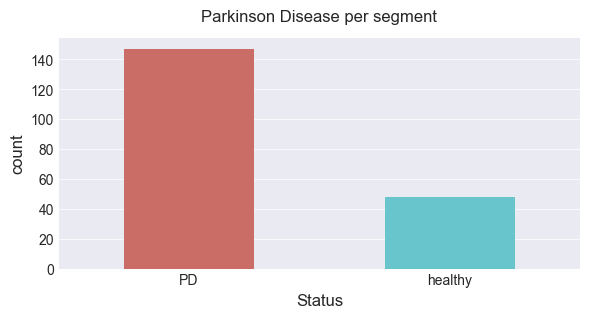

status
PD         0.753846
healthy    0.246154
Name: proportion, dtype: float64


In [39]:
fig, ax=  plt.subplots(1, 1, figsize =(6,3))
# sns.set_style('dark')
plt.style.use(['bmh', 'seaborn-v0_8-darkgrid'])
sns.countplot(data=df,x='status',palette='hls', width=0.5, ax=ax)
plt.tight_layout()
plt.title('Parkinson Disease per segment', fontsize='12', pad=12)
plt.xlabel('Status',fontsize='12')
plt.ylabel('count',fontsize='12')
plt.show()

print(df.status.value_counts(normalize=True))

- Our data is imbalanced; May lead to model poor performance
- To cure imblance datasets, we can use SMOTE(Synthetic Minority Oversampling technique)

In [40]:
# import time
# # fig, ax=  plt.subplots(1, 1, figsize =(6,4))
# # plt.figure(figsize=(8,3))
# # sns.set_style('dark')
# fig, ax = plt.subplots(3,2, figsize=(10,8))
# style = 'ggplot'
# cols = np.array(non_cor_list[:len(non_cor_list)-1]).reshape(3,2)

# for i,j in enumerate(cols):
#     for k, w in enumerate(j):
#         # sns.categorical.barplot(data=data,y='{col_name}'.format(col_name=w),hue='status',palette='Blues', width=0.2,ax=ax[i,k]) 
        
#         sns.categorical.boxplot(data=df,y='{col_name}'.format(col_name=w),
#                                 hue='status', gap=0.7, palette='hls', linewidth= 1.8, ax=ax[i,k])
#         ax[i,k].legend(title='', loc='upper right', fontsize='8')

# plt.tight_layout(pad=2.5)
# plt.show()

#### **Building Models**

- Construction of multiple models is conducted in this project
- Each model undergoes through evaluation and comparison process
- Performance rates of all models will be assesed
- Better performing model will be choosen for furhter analysis

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def training_testing_set(frame: pd.DataFrame,columns=[])->tuple:
    #> Features and target
    drop_columns = ['status'] + columns #Include features to drop for feature selection
    features = frame.drop(['status'],axis=1).values

    target = frame['status'].values

    #> Label encoding(target)
    label_encoder = LabelEncoder()
    target = label_encoder.fit_transform(target)

    #> Split training and testing set
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=43)

    # #> feature scaling & reshaping target
    #Scaling numeric features into one scale; Removing outliers and ensuring unbiased model
    #Reshape the target for machine to understand
    scaler = StandardScaler()
    
    training_set = scaler.fit_transform(X_train), y_train.reshape(-1,1)
    testing_set = scaler.fit_transform(X_test), y_test.reshape(-1,1) 
    
    return training_set, testing_set

In [118]:
#> Building Models
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score)


#Return dataframe of metric scores
def create_metric_dataframe(scores: tuple, columns: list): 
    
    metric = pd.DataFrame(
        scores, columns=columns
    ).sort_values(['acccuracy', 'precision', 'recall', 'f1-score','roc_auc'], ascending=False)
    metric.index = metric.classifier
    return  metric.drop(['classifier'],axis=1).round(3)

#Build model pipelines of choice; model can be remove or addded here
def build_model_pipelines():
    pipelines = Pipeline([
        ('SVC',SVC(random_state=1)),
        ('KNN',KNeighborsClassifier()),
        ('Logistic',LogisticRegression(random_state=1,)),
        ('Tree',DecisionTreeClassifier(random_state=1)),
        ('NB',GaussianNB()),
    ])
    return pipelines

def model_performance(training: tuple, testing: tuple) -> pd.DataFrame:
    
    #setting-up training and testing set
    X_train, y_train = training
    X_test, y_test= testing
    
    #pipelines
    pipelines = build_model_pipelines()
    
    models = [(name, model.fit(X_train, y_train)) for name, model in zip(pipelines.named_steps, pipelines)] 
    metric = []
    for name, model in models:
        y_pred = model.predict(X_test) #Prediction on testing data
        acc= accuracy_score(y_test, y_pred,normalize=True)
        precision= precision_score(y_test, y_pred) 
        recall= recall_score(y_test, y_pred)
        f1= f1_score(y_test, y_pred)
        roc_auc= roc_auc_score(y_test, y_pred)
        metric.append([name, acc, precision, recall, f1, roc_auc])

    column_names = ['classifier','acccuracy', 'precision', 'recall', 'f1-score','roc_auc']
    
    return create_metric_dataframe(metric, column_names)

In [119]:
#Evaluating performances
train_set, test_set = training_testing_set(df)
model_performance(train_set, test_set)

,acccuracy,precision,recall,f1-score,roc_auc
classifier,,,,,
SVC,0.974,1.000,0.857,0.923,0.929
Tree,0.949,0.778,1.000,0.875,0.969
KNN,0.923,0.833,0.714,0.769,0.842
Logistic,0.897,0.636,1.000,0.778,0.938
NB,0.615,0.318,1.000,0.483,0.766


- `SVC` and `Random forest` have overall highest performance followed by `decision tree` etc.
- `Naive Bayes` produced worst performace of all trained models.
- `SVC` has higher recall score, followed by `KNN` and `GBoost`.
- The aim is to find an optimal model
- Thus we proceed to feature selection (informative features should be selected) process

>##### **Feature Selection Methods**

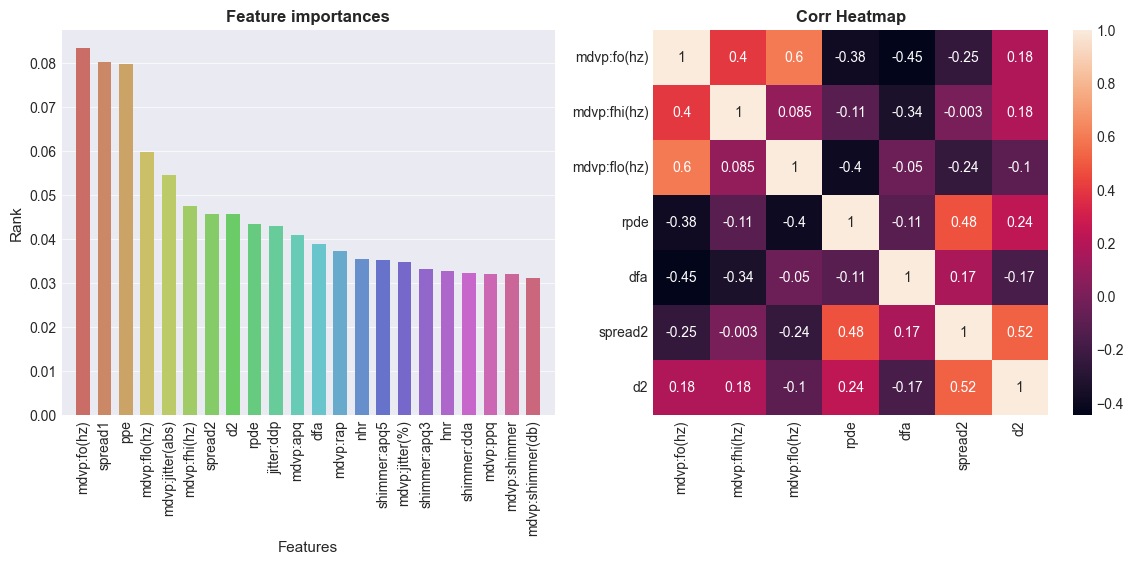

In [124]:

# We apply extra tree cclassifier to ensure that we select features with high impact(more informative) on our models
from sklearn.ensemble import ExtraTreesClassifier
(X_train, y_train),_=training_testing_set(df)

# Get feature importances
extra_tree_model = ExtraTreesClassifier(n_estimators=250,random_state=0)

train,_=training_testing_set(df)
extra_tree_model.fit(X_train, y_train)
importances = extra_tree_model.feature_importances_

std = np.std([tree.feature_importances_ for tree in extra_tree_model.estimators_],axis=0)
sorted_index = np.argsort(importances)[::-1]
feature_name = [data_frame.columns[indx] for indx in sorted_index]

# Print the feature ranking
# print("-------Feature ranking:--------")
# for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, sorted_index[f], importances[sorted_index[f]]))

# Plot the feature importances of the forest
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2), (0,0))
ax2 = plt.subplot2grid((1,2), (0,1))
sns.barplot(x=range(len(sorted_index)), y=importances[sorted_index],color="red",ax=ax1,palette="hls", gap=0.2)#, yerr=std[sorted_index], align="center",ax=ax1)
ax1.set_xticks(range(len(sorted_index)), feature_name, rotation=90)
ax1.set_xlim([-1, X_train.shape[1]])
ax1.set_title("Feature importances",fontweight='bold',fontsize='12')
ax1.set_ylabel('Rank',fontsize='11')
ax1.set_xlabel('Features',fontsize='11')

# #Correlation Feature Selection
corr =data_frame.corr()
new_corr = corr[corr.abs()>=0.8]
corr_columns = np.unique([new_corr.index[i] for name in data_frame.columns for i,j in enumerate(new_corr[name].values) if 0.8 <= abs(j) < 1])
frame = data_frame.drop(corr_columns,axis=1)
sns.heatmap(frame.corr(),annot=True,ax=ax2)
ax2.set_title("Corr Heatmap", fontsize='12',fontweight='bold')
plt.show()

# del data_frame

- The plots show informative features which could be used during model training
- For extra tree(forest) approach the cut-off rank will be `0.04`
- For correlation approach, all visible features in the plot are selected

In [127]:
discard_features=[feature for feature, rank in list(zip(feature_name ,importances)) if rank<0.04]
train_set, test_set = training_testing_set(df,discard_features)
print('ExtraTreeClassifier Feature Importance')
model_performance(train_set, test_set)

ExtraTreeClassifier Feature Importance


,acccuracy,precision,recall,f1-score,roc_auc
classifier,,,,,
SVC,0.974,1.000,0.857,0.923,0.929
Tree,0.949,0.778,1.000,0.875,0.969
KNN,0.923,0.833,0.714,0.769,0.842
Logistic,0.897,0.636,1.000,0.778,0.938
NB,0.615,0.318,1.000,0.483,0.766


In [128]:
train_set, test_set = training_testing_set(df,frame.columns.values)
print('Correlation Feature Importance')
model_performance(train_set, test_set)

Correlation Feature Importance


,acccuracy,precision,recall,f1-score,roc_auc
classifier,,,,,
SVC,0.974,1.000,0.857,0.923,0.929
Tree,0.949,0.778,1.000,0.875,0.969
KNN,0.923,0.833,0.714,0.769,0.842
Logistic,0.897,0.636,1.000,0.778,0.938
NB,0.615,0.318,1.000,0.483,0.766


- Either removing features from correlation or extra tree classifier perspective, the models did not improve.
- Therefore we try tuning-hyperparameters and keep all features in the dataset.

>##### **Tunning Model Hyperparameters**

In [46]:
#Trained Models
pipelines = build_model_pipelines()
pipelines

Pipeline(steps=[('SVC', SVC(random_state=1)), ('KNN', KNeighborsClassifier()),
                ('Logistic', LogisticRegression(random_state=1)),
                ('Tree', DecisionTreeClassifier(random_state=1)),
                ('NB', GaussianNB())])

In [122]:
#Tuning hyperparameters
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

#setup parameters
params_grid = {
    'Logistic':  dict(solver=['newton-cg', 'lbfgs', 'liblinear'], penalty=['l2'],C=[100, 10, 1.0, 0.1, 0.01]),
    'SVC': dict(C=[100, 10, 1.0, 0.1, 0.01],kernel=['poly','linear','rbf', 'sigmoid'], gamma=['scale']),
    'Tree': dict(criterion=['gini','entropy','log_loss'], splitter=['best','random'], max_features=list(range(1,100,5))),
    'KNN': dict(n_neighbors=list(range(1,21,2)), weights=['uniform','distance'],metric=['euclidean','manhattan','minkowski']), 
    'NB': dict(var_smoothing=[1e-12, 1e-11, 1e-10, 1e-9]),
}

#Training and testing set
(X_train, y_train), (X_test, y_test) = training_testing_set(df)

def tune_parameters_func(model, params):
    cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_model = GridSearchCV(model,param_grid=params,cv=cross_val, n_jobs=-1, scoring='accuracy')
    grid_model.fit(X_train, y_train)
    return  grid_model.best_params_ , grid_model.best_estimator_

def tuned_hyperparameters_scores() -> pd.DataFrame:
    
    metric=[]
    columns = ['classifier','acccuracy', 'precision', 'recall', 'f1-score','roc_auc']
    
    for key, model in tqdm(pipelines.steps):
        if key not in params_grid.keys(): continue #Skip if model name is not found in paramater grid
        params = params_grid[key] #Get parameters to tune
        _, model=tune_parameters_func(model,params) # Get model with tune-parameters
        y_pred = model.predict(X_test) #Prediction on testing data
        acc= accuracy_score(y_test, y_pred,normalize=True)
        precision= precision_score(y_test, y_pred) 
        recall= recall_score(y_test, y_pred)
        f1= f1_score(y_test, y_pred)
        roc_auc= roc_auc_score(y_test, y_pred)
        
        metric.append((key,acc,precision,recall,f1,roc_auc))
        # print(metric)
    return create_metric_dataframe(metric,columns)

In [129]:
%%time
tuned_hyperparameters_scores()

100%|██████████| 5/5 [02:57<00:00, 35.49s/it]


CPU times: total: 5.03 s
Wall time: 3min 5s


,acccuracy,precision,recall,f1-score,roc_auc
classifier,,,,,
SVC,0.974,0.875,1.000,0.933,0.984
KNN,0.949,0.857,0.857,0.857,0.913
Logistic,0.949,0.778,1.000,0.875,0.969
Tree,0.795,0.400,0.286,0.333,0.596
NB,0.615,0.318,1.000,0.483,0.766


>##### **Conclusion**: (After tuned-parameters)
- Overall support vector remained as the better performing model.
- Knearest neighbors and Logistic model improvement  of  approximately 10% and 11% `f1-score` respectively.
- Decision tree and Naive bayes did not improve at all.
- In this study cares about sentivity (recall), meanig the model must correctly discriminate healthy people from those with Parkinson Disease.
- Thus we choose `support vector` model for detecting parkison disease